In [1]:
#pip install mysql-connector-python

In [ ]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items') # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='pranav',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/prana/Downloads/archive'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db=mysql.connector.connect(host='localhost',
                          username='root',
                          password='pranav',
                          database='ecommerce')
cur=db.cursor()

## List all unique cities where customers are located.

In [3]:
query= """ SELECT distinct customer_city FROM ecommerce.customers """
cur.execute(query)
data= cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

## Count the number of orders placed in 2017.

In [4]:
query= """ select count(order_id) as order_count from orders
where year(order_purchase_timestamp)= 2017 """
cur.execute(query)
data= cur.fetchall()
data

[(45101,)]

## Find the total sales per category.

In [5]:
query= """ select upper(pr.product_category) as category, round(sum(pa.payment_value),2) as sales from products pr
join order_items o on pr.product_id=o.product_id
join payments pa on pa.order_id= o.order_id
group by category """
cur.execute(query)
data= cur.fetchall()
data

[('PERFUMERY', 506738.66),
 ('FURNITURE DECORATION', 1430176.39),
 ('TELEPHONY', 486882.05),
 ('BED TABLE BATH', 1712553.67),
 ('AUTOMOTIVE', 852294.33),
 ('COMPUTER ACCESSORIES', 1585330.45),
 ('HOUSEWARES', 1094758.13),
 ('BABIES', 539845.66),
 ('TOYS', 619037.69),
 ('FURNITURE OFFICE', 646826.49),
 ('COOL STUFF', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('PET SHOP', 311268.97),
 ('GENERAL INTEREST BOOKS', 64694.76),
 ('STATIONARY STORE', 317440.07),
 ('WATCHES PRESENT', 1429216.68),
 ('PCS', 279121.55),
 ('CLIMATIZATION', 91170.66),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 241475.63),
 ('SPORT LEISURE', 1392127.56),
 ('BAGS ACCESSORIES', 187151.29),
 ('ELECTRONICS', 259857.1),
 ('CASA CONSTRUCAO', 136645.29),
 ('GAMES CONSOLES', 195480.38),
 ('FASHION BAGS AND ACCESSORIES', 218158.28),
 ('HOME APPLIANCES', 95532.27),
 ('GARDEN TOOLS', 838280.75),
 ('AGRO INDUSTRIA E COMERCIO', 118730.61),
 (None, 252801.71),
 ('AUDIO', 60324.62),
 ('TECHNICAL BOOKS', 24915.44),
 ('CONSTRUCTION TOOLS 

In [6]:
df=pd.DataFrame(data,columns=['category','sales'])
df

,category,sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


## Calculate the percentage of orders that were paid in installments.

In [7]:
query= """ select sum(case when payment_installments>=1 then 1 else 0 end)*100/count(payment_installments) as percent_count
from payments """
cur.execute(query)
data= cur.fetchall()
data

[(Decimal('99.9981'),)]

## Count the number of customers from each state. 

In [8]:
query= """ select customer_state, count(customer_id) as customer_count from customers
group by customer_state """
cur.execute(query)
data= cur.fetchall()
data

[('SP', 41746),
 ('SC', 3637),
 ('MG', 11635),
 ('PR', 5045),
 ('RJ', 12852),
 ('RS', 5466),
 ('PA', 975),
 ('GO', 2020),
 ('ES', 2033),
 ('BA', 3380),
 ('MA', 747),
 ('MS', 715),
 ('CE', 1336),
 ('DF', 2140),
 ('RN', 485),
 ('PE', 1652),
 ('MT', 907),
 ('AM', 148),
 ('AP', 68),
 ('AL', 413),
 ('RO', 253),
 ('PB', 536),
 ('TO', 280),
 ('PI', 495),
 ('AC', 81),
 ('SE', 350),
 ('RR', 46)]

In [9]:
df=pd.DataFrame(data,columns=['State','Customer_count'])
df=df.sort_values(by='Customer_count',ascending=False)

In [10]:
df

,State,Customer_count
0,SP,41746
4,RJ,12852
2,MG,11635
5,RS,5466
3,PR,5045
1,SC,3637
9,BA,3380
13,DF,2140
8,ES,2033
7,GO,2020


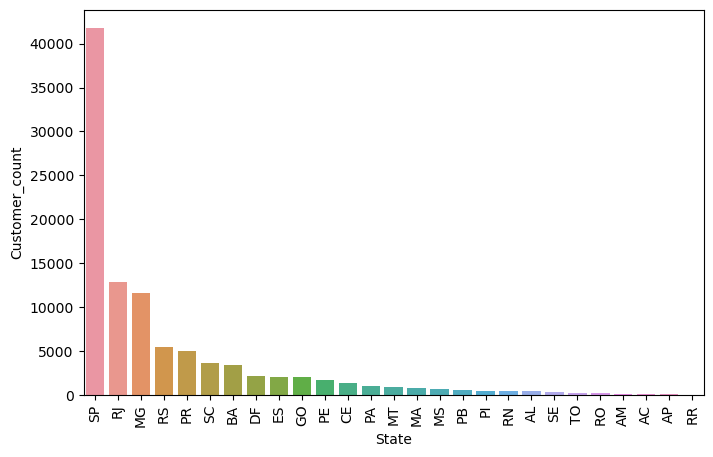

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(df,x='State',y='Customer_count')
plt.xticks(rotation=90);

## Calculate the number of orders per month in 2018.

In [12]:
query= """ select monthname(order_purchase_timestamp) as Months,count(order_id) as Count_orders from orders
where year(order_purchase_timestamp)=2018
group by Months """
cur.execute(query)
data= cur.fetchall()
data

[('July', 6292),
 ('August', 6512),
 ('February', 6728),
 ('June', 6167),
 ('March', 7211),
 ('January', 7269),
 ('May', 6873),
 ('April', 6939),
 ('September', 16),
 ('October', 4)]

In [13]:
df=pd.DataFrame(data,columns=['Months','Count_orders'])
o = ["January", "February","March","April","May","June","July","August","September","October"]

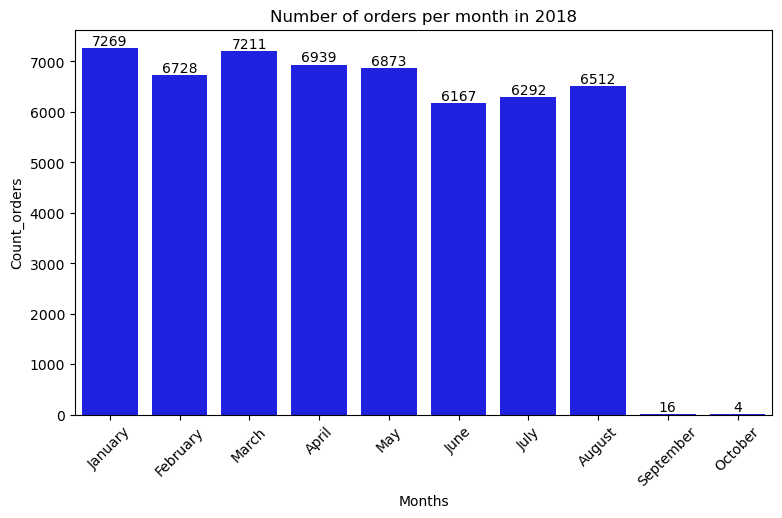

In [14]:
plt.figure(figsize=(9,5))
ax=sns.barplot(df,x='Months',y='Count_orders',order=o,color='blue')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title('Number of orders per month in 2018');

## Find the average number of products per order, grouped by customer city.

In [15]:
query= """ with cte as (select orders.order_id, customers.customer_city,  count(order_items.order_id) as oc
from orders join order_items on orders.order_id=order_items.order_id
join customers on orders.customer_id=customers.customer_id
group by orders.order_id, orders.customer_id,customers.customer_city)
select customer_city, round(avg(cte.oc),2) as avg_orders
from cte
group by customer_city
order by avg_orders desc; """
cur.execute(query)
data= cur.fetchall()
data

[('padre carvalho', Decimal('7.00')),
 ('celso ramos', Decimal('6.50')),
 ('datas', Decimal('6.00')),
 ('candido godoi', Decimal('6.00')),
 ('matias olimpio', Decimal('5.00')),
 ('cidelandia', Decimal('4.00')),
 ('picarra', Decimal('4.00')),
 ('curralinho', Decimal('4.00')),
 ('teixeira soares', Decimal('4.00')),
 ('morro de sao paulo', Decimal('4.00')),
 ('inconfidentes', Decimal('3.50')),
 ('ipua', Decimal('3.25')),
 ('alto paraiso de goias', Decimal('3.00')),
 ('nova esperanca do sul', Decimal('3.00')),
 ('capela', Decimal('3.00')),
 ('ouvidor', Decimal('3.00')),
 ('pedregulho', Decimal('3.00')),
 ('jose boiteux', Decimal('3.00')),
 ('ubata', Decimal('3.00')),
 ('brasileia', Decimal('3.00')),
 ('chapadao do lageado', Decimal('3.00')),
 ('pacuja', Decimal('3.00')),
 ('buriti', Decimal('3.00')),
 ('ubajara', Decimal('2.67')),
 ('colonia castrolanda', Decimal('2.67')),
 ('sao miguel dos campos', Decimal('2.50')),
 ('colonia jordaozinho', Decimal('2.50')),
 ('maracana', Decimal('2.50'))

In [16]:
df=pd.DataFrame(data,columns=['Customer_city','Avg_products_per_orders'])
df.head(10)

,Customer_city,Avg_products_per_orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,curralinho,4.00
8,teixeira soares,4.00
9,morro de sao paulo,4.00


## Calculate the percentage of total revenue contributed by each product category.

In [18]:
query= """ select upper(pr.product_category) as category, round(sum(pa.payment_value)*100/(select sum(payment_value) from payments),2) as revenue from products pr
join order_items o on pr.product_id=o.product_id
join payments pa on pa.order_id= o.order_id
group by category
order by revenue desc """
cur.execute(query)
data= cur.fetchall()
data

[('BED TABLE BATH', 10.7),
 ('HEALTH BEAUTY', 10.35),
 ('COMPUTER ACCESSORIES', 9.9),
 ('FURNITURE DECORATION', 8.93),
 ('WATCHES PRESENT', 8.93),
 ('SPORT LEISURE', 8.7),
 ('HOUSEWARES', 6.84),
 ('AUTOMOTIVE', 5.32),
 ('GARDEN TOOLS', 5.24),
 ('COOL STUFF', 4.87),
 ('FURNITURE OFFICE', 4.04),
 ('TOYS', 3.87),
 ('BABIES', 3.37),
 ('PERFUMERY', 3.17),
 ('TELEPHONY', 3.04),
 ('STATIONARY STORE', 1.98),
 ('PET SHOP', 1.94),
 ('PCS', 1.74),
 ('ELECTRONICS', 1.62),
 (None, 1.58),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 1.51),
 ('MUSICAL INSTRUMENTS', 1.46),
 ('ELECTROSTILE', 1.41),
 ('FASHION BAGS AND ACCESSORIES', 1.36),
 ('FIXED TELEPHONY', 1.29),
 ('GAMES CONSOLES', 1.22),
 ('BAGS ACCESSORIES', 1.17),
 ('CASA CONSTRUCAO', 0.85),
 ('ROOM FURNITURE', 0.85),
 ('ELECTRICES 2', 0.78),
 ('AGRO INDUSTRIA E COMERCIO', 0.74),
 ('HOME APPLIANCES', 0.6),
 ('CLIMATIZATION', 0.57),
 ('HOUSE COMFORT', 0.53),
 ('FURNITURE KITCHEN SERVICE AREA DINNER AND GARDEN', 0.47),
 ('CONSTRUCTION TOOLS ILLUMINATION',

In [20]:
df=pd.DataFrame(data,columns=['Product_category','Revenue'])
df.head(5)

,Product_category,Revenue
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93


## Identify the correlation between product price and the number of times a product has been purchased.

In [21]:
query= """ select products.product_category, count(order_items.product_id) as product_count, round(avg(order_items.price),2) as product_price
from products join order_items
on products.product_id=order_items.product_id
group by products.product_category """
cur.execute(query)
data= cur.fetchall()
data

[('HEALTH BEAUTY', 9670, 130.16),
 ('sport leisure', 8641, 114.34),
 ('Cool Stuff', 3796, 167.36),
 ('computer accessories', 7827, 116.51),
 ('Watches present', 5991, 201.14),
 ('housewares', 6964, 90.79),
 ('electronics', 2767, 57.91),
 (None, 1603, 112.0),
 ('toys', 4117, 117.55),
 ('bed table bath', 11115, 93.3),
 ('Games consoles', 1137, 138.49),
 ('automotive', 4235, 139.96),
 ('Furniture Decoration', 8334, 87.56),
 ('home appliances', 771, 103.98),
 ('telephony', 4545, 71.21),
 ('Construction Tools Construction', 929, 155.73),
 ('perfumery', 3419, 116.74),
 ('stationary store', 2517, 91.75),
 ('Room Furniture', 503, 137.01),
 ('Fashion Bags and Accessories', 2031, 75.25),
 ('Garden tools', 4347, 111.63),
 ('Fashion Underwear and Beach Fashion', 131, 72.84),
 ('pet Shop', 1947, 110.07),
 ('SIGNALIZATION AND SAFETY', 199, 108.09),
 ('ELECTRICES 2', 238, 476.12),
 ("Fashion Women's Clothing", 48, 58.41),
 ('Bags Accessories', 1092, 128.6),
 ('General Interest Books', 553, 84.73),
 (

In [22]:
df=pd.DataFrame(data,columns=['Product_category','Product_count','Product_price'])
df.head(5)

,Product_category,Product_count,Product_price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14


In [25]:
arr1=df['Product_count']
arr2=df['Product_price']
a= np.corrcoef([arr1,arr2])
print('The correlation between product price and the number of times a product has been purchased is', a[0][1] )

The correlation between product price and the number of times a product has been purchased is -0.10631514167157562


### As the correlation value is -0.106 which is close to 0. So, there is neutral relationship between product count and product price.

## Calculate the total revenue generated by each seller, and rank them by revenue.

In [28]:
query= """ with cte as (select order_items.seller_id, round(sum(payments.payment_value),2) as revenue
from order_items join payments on order_items.order_id=payments.order_id
group by order_items.seller_id)
select *, dense_rank() over(order by revenue desc) as rnk
from cte """
cur.execute(query)
data= cur.fetchall()
data

[('7c67e1448b00f6e969d365cea6b010ab', 507166.91, 1),
 ('1025f0e2d44d7041d6cf58b6550e0bfa', 308222.04, 2),
 ('4a3ca9315b744ce9f8e9374361493884', 301245.27, 3),
 ('1f50f920176fa81dab994f9023523100', 290253.42, 4),
 ('53243585a1d6dc2643021fd1853d8905', 284903.08, 5),
 ('da8622b14eb17ae2831f4ac5b9dab84a', 272219.32, 6),
 ('4869f7a5dfa277a7dca6462dcf3b52b2', 264166.12, 7),
 ('955fee9216a65b617aa5c0531780ce60', 236322.3, 8),
 ('fa1c13f2614d7b5c4749cbc52fecda94', 206513.23, 9),
 ('7e93a43ef30c4f03f38b393420bc753a', 185134.21, 10),
 ('6560211a19b47992c3666cc44a7e94c0', 179657.75, 11),
 ('7a67c85e85bb2ce8582c35f2203ad736', 169030.8, 12),
 ('25c5c91f63607446a97b143d2d535d31', 160534.74, 13),
 ('a1043bafd471dff536d0c462352beb48', 154356.91, 14),
 ('46dc3b2cc0980fb8ec44634e21d2718e', 148864.34, 15),
 ('b37c4c02bda3161a7546a4e6d222d5b2', 145319.04, 16),
 ('620c87c171fb2a6dd6e8bb4dec959fc6', 145267.95, 17),
 ('cc419e0650a3c5ba77189a1882b7556a', 141309.58, 18),
 ('5dceca129747e92ff8ef7a997dc4f8ca', 1

In [32]:
df=pd.DataFrame(data,columns=['Seller_id','Revenue','Ranks'])
df=df.head()

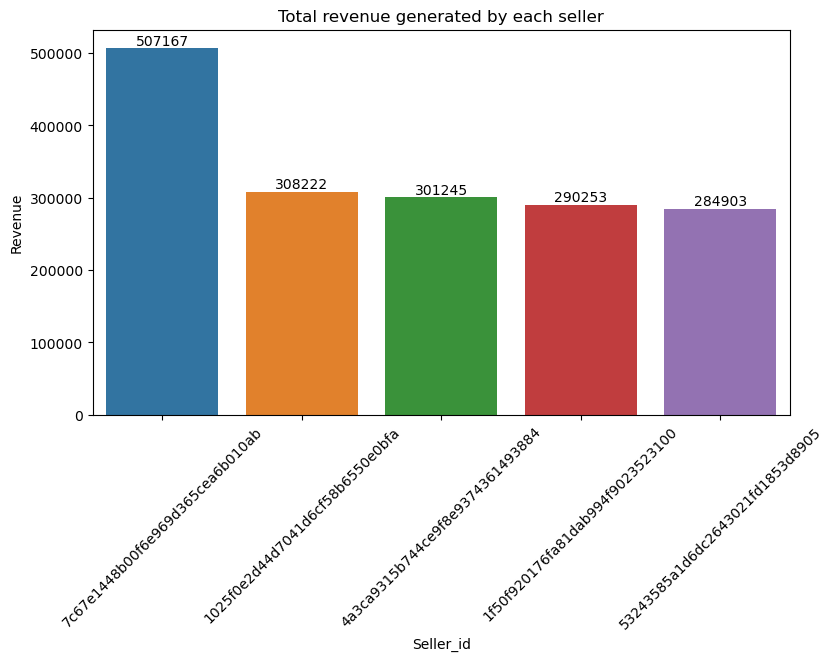

In [33]:
plt.figure(figsize=(9,5))
ax=sns.barplot(df,x='Seller_id',y='Revenue')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title('Total revenue generated by each seller');

## Calculate the moving average of order values for each customer over their order history.

In [34]:
query= """ select *, avg(payment) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as moving_avg
from 
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment from orders
join payments on orders.order_id=payments.order_id) as a """
cur.execute(query)
data= cur.fetchall()
data

[('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41,
  67.41000366210938),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43',
  195.42,
  195.4199981689453),
 ('0002414f95344307404f0ace7a26f1d5',
  '2017-08-16 13:09:20',
  179.35,
  179.35000610351562),
 ('000379cdec625522490c315e70c7a9fb',
  '2018-04-02 13:42:17',
  107.01,
  107.01000213623047),
 ('0004164d20a9e969af783496f3408652',
  '2017-04-12 08:35:12',
  71.8,
  71.80000305175781),
 ('000419c5494106c306a97b5635748086',
  '2018-03-02 17:47:40',
  49.4,
  49.400001525878906),
 ('00046a560d407e99b969756e0b10f282',
  '2017-12-18 11:08:30',
  166.59,
  166.58999633789062),
 ('00050bf6e01e69d5c0fd612f1bcfb69c',
  '2017-09-17 16:04:44',
  85.23,
  85.2300033569336),
 ('000598caf2ef4117407665ac33275130',
  '2018-08-11 12:14:35',
  1255.71,
  1255.7099609375),
 ('0005aefbb696d34b3424dccd0a0e9fd0',
  '2018-06-20 0

In [37]:
df=pd.DataFrame(data,columns=['Customer_id','Time_stamp','Payment','Moving_avg'])
df.head()

,Customer_id,Time_stamp,Payment,Moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


## Calculate the cumulative sales per month for each year

In [38]:
query= """ select years,months, sum(sales) over(order by years,months) as cumulative_sales
from (select year(orders.order_purchase_timestamp) years, month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as sales from orders join payments on orders.order_id=payments.order_id
group by years,months
order by years,months) as a """
cur.execute(query)
data= cur.fetchall()
data

[(2016, 9, 252.24),
 (2016, 10, 59342.72),
 (2016, 12, 59362.340000000004),
 (2017, 1, 197850.38),
 (2017, 2, 489758.39),
 (2017, 3, 939621.99),
 (2017, 4, 1357410.02),
 (2017, 5, 1950328.8399999999),
 (2017, 6, 2461605.2199999997),
 (2017, 7, 3053988.1399999997),
 (2017, 8, 3728384.4599999995),
 (2017, 9, 4456146.909999999),
 (2017, 10, 5235824.789999999),
 (2017, 11, 6430707.589999999),
 (2017, 12, 7309109.069999998),
 (2018, 1, 8424113.249999998),
 (2018, 2, 9416576.589999998),
 (2018, 3, 10576228.709999997),
 (2018, 4, 11737014.189999998),
 (2018, 5, 12890996.339999998),
 (2018, 6, 13914876.839999998),
 (2018, 7, 14981417.589999998),
 (2018, 8, 16003842.909999998),
 (2018, 9, 16008282.449999997),
 (2018, 10, 16008872.119999997)]

In [40]:
df=pd.DataFrame(data,columns=['Years','Months','Cumulative_sales'])
df

,Years,Months,Cumulative_sales
0,2016,9,252.24
1,2016,10,59342.72
2,2016,12,59362.34
3,2017,1,197850.38
4,2017,2,489758.39
5,2017,3,939621.99
6,2017,4,1357410.02
7,2017,5,1950328.84
8,2017,6,2461605.22
9,2017,7,3053988.14


## Calculate the year-over-year growth rate of total sales.

In [41]:
query= """ with cte as (select year(orders.order_purchase_timestamp) years, round(sum(payments.payment_value),2) as sales
from orders join payments on orders.order_id=payments.order_id
group by years
order by years)
select years, ifnull(round((sales-lag(sales) over(order by years))*100/lag(sales) over(order by years),2),0) as yoy_growth from cte """
cur.execute(query)
data= cur.fetchall()
data

[(2016, 0.0), (2017, 12112.7), (2018, 20.0)]

In [43]:
df=pd.DataFrame(data,columns=['Years','yoy_growth'])
df

,Years,yoy_growth
0,2016,0.0
1,2017,12112.7
2,2018,20.0


## Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [44]:
query= """ with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id """
cur.execute(query)
data= cur.fetchall()
data

[(None,)]

## Identify the top 3 customers who spent the most money in each year

In [45]:
query= """ with cte as (select year(orders.order_purchase_timestamp) as Years, orders.customer_id, round(sum(payments.payment_value),2) as money
from orders join payments on orders.order_id= payments.order_id
group by Years, orders.customer_id)
select * from (select *, row_number() over(partition by Years order by money desc) as rnk
from cte) as a where rnk<=3 """
cur.execute(query)
data= cur.fetchall()
data

[(2016, 'a9dc96b027d1252bbac0a9b72d837fc6', 1423.55, 1),
 (2016, '1d34ed25963d5aae4cf3d7f3a4cda173', 1400.74, 2),
 (2016, '4a06381959b6670756de02e07b83815f', 1227.78, 3),
 (2017, '1617b1357756262bfa56ab541c47bc16', 13664.08, 1),
 (2017, 'c6e2731c5b391845f6800c97401a43a9', 6929.31, 2),
 (2017, '3fd6777bbce08a352fddd04e4a7cc8f6', 6726.66, 3),
 (2018, 'ec5b2ba62e574342386871631fafd3fc', 7274.88, 1),
 (2018, 'f48d464a0baaea338cb25f816991ab1f', 6922.21, 2),
 (2018, 'e0a2412720e9ea4f26c1ac985f6a7358', 4809.44, 3)]

In [46]:
df=pd.DataFrame(data,columns=['Years','id','money_made','rank'])
df

,Years,id,money_made,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.55,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.74,2
2,2016,4a06381959b6670756de02e07b83815f,1227.78,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.08,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.31,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.88,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.21,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.44,3


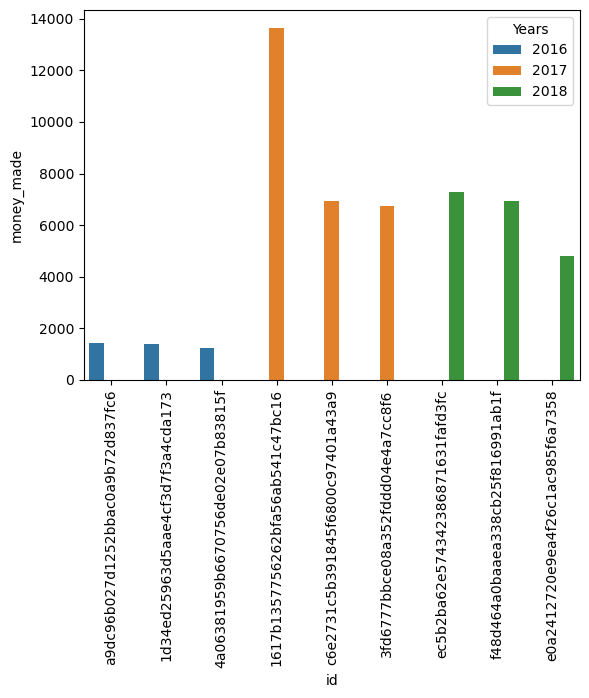

In [51]:
sns.barplot(df,x='id',y='money_made',hue='Years')
plt.xticks(rotation=90);